<a href="https://colab.research.google.com/github/villafue/Machine_Learning_Notes/blob/master/Supervised_Learning/Hyperparameter%20Tuning%20in%20Python/1%20Hyperparameters%20and%20Parameters/1_Hyperparameters_and_Parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyperparameters and Parameters

In this introductory chapter you will learn the difference between hyperparameters and parameters. You will practice extracting and analyzing parameters, setting hyperparameter values for several popular machine learning algorithms. Along the way you will learn some best practice tips & tricks for choosing which hyperparameters to tune and what values to set & build learning curves to analyze your hyperparameter choices.

# Introduction & 'Parameters'

1. Hyperparameter tuning in python
Welcome to the first lecture of Hyperparameter Tuning in Python. I am Alex, a Data Scientist from Sydney, Australia.

2. Introduction
So why study this course? Today algorithms are getting more and more complex, and so the number of hyperparameters to choose from increases. It becomes increasingly important to learn how to efficiently find optimal combinations, as this search will likely take up a large portion of your time. Often it is quite easy to simply run Scikit Learn functions on the default settings or perhaps code from a tutorial or book without really digging under the hood. However, what lies underneath is of vital importance to good model building. You may be surprised what you find!

3. The dataset
This course will use a dataset about credit card defaults. It contains a number of variables related to the demographics and financial history of a group of people. The target column shows whether or not they defaulted on their next loan payment. It has already been pre-processed and split ready to model. Note that at times we will take smaller samples to ensure we can run the code. You can find out more about it at the link in the slides.

4. Parameters Overview
To understand hyperparameters, let's first start with parameters. What are parameters? Parameters are components of the final model that are learned through the modeling process. Crucially, you do not set these. You cannot set these. The algorithm discovers them through undertaking its steps.

5. Parameters in Logistic Regression
To make this concrete, consider a simple logistic regression model. We create the estimator and fit to the data with default settings. Since the logistic regression model is a linear model, we will get beta coefficients on our variables. These are found in the coef_ property of our logistic regression object. However, if we print these out we can see it is a bit messy.

6. Parameters in Logistic Regression
Let us clean this up by creating a list of original variable names, zipping this up with the coefficients and formatting into a neat DataFrame for easy viewing.

7. Parameters in Logistic Regression
We can now sort the DataFrame and print the top 3 results for brevity. Do you recall setting PAY_0 to have a coefficient of 0-point-000751? I don't. The coefficients are parameters because we did not set them ourselves and were learned during the modeling process. In our data, the PAY variables relate to how many months people have previously delayed their payments. We can see that having a high number of months of delayed payments, makes someone more likely to default next month.

8. Where to find Parameters
To know what parameters an algorithm will produce, you need to Know a bit about the algorithm itself and how it works. And consult the Scikit Learn documentation to see where the parameter is stored in the returned object. The parameters are found in the documentation for that particular algorithm under the 'Attributes' section, not the parameters section

9. Parameters in Random Forest
So what are the parameters in tree-based models that do not have linear coefficients? The parameters of this model are in the nodes of the trees used to build the model such as what feature was split on and at what value. To demonstrate, let us firstly build a random forest estimator & fit to our data, setting the max_depth to be quite low only for visualization purposes. Then we can pull out a single tree, found in the random forest estimator 'estimators_' attribute to visualize. For simplicity we will just show the image but you can explore visualizing this yourself using the mentioned packages.

10. Parameters in Random Forest
Here we see a graph of the nodes including the variables and values used in the splits. We can see that the very first split was on the variable PAY_4 and it sent samples left or right depending if they had a value above or below 1 for this variable. Do you remember setting this decision? I certainly don't!

11. Extracting Node Decisions
So how do we pull out the splits we saw here visually in a programmatic way? Let's say, the left, second-from-top node. The tree we pulled out is a Scikit Learn 'tree' object so we can find the variable it split on by indexing into the .feature attribute of this tree and matching up with our X_train columns to get the name. The level used to split is then found in the dot-threshold attribute. And we can then print this out.

12. Let's practice!
Let's do some exercises to further explore the parameters of these models!

# Parameters in Logistic Regression

Now that you have had a chance to explore what a parameter is, let us apply this knowledge. It is important to be able to review any new algorithm and identify which elements are parameters and hyperparameters.

Which of the following is a parameter for the Scikit Learn logistic regression model? Here we mean conceptually based on the theory introduced in this course. NOT what the Scikit Learn documentation calls a parameter or attribute.

Answer the question
50XP
Possible Answers

1. n_jobs
 - Incorrect: Not quite, this is something you set so not a parameter.

2. coef_
 - Yes! coef_ contains the important information about coefficients on our variables in the model. We do not set this, it is learned by the algorithm through the modeling process.

3. class_weight
 - Incorrect: Not quite, this is something you set so not a parameter.

4. LogisticRegression()
 - Incorrect: This is how you create a logistic regression estimator, it is not a parameter.

# Extracting a Logistic Regression parameter

You are now going to practice extracting an important parameter of the logistic regression model. The logistic regression has a few other parameters you will not explore here but you can review them in the scikit-learn.org documentation for the LogisticRegression() module under 'Attributes'.

This parameter is important for understanding the direction and magnitude of the effect the variables have on the target.

In this exercise we will extract the coefficient parameter (found in the coef_ attribute), zip it up with the original column names, and see which variables had the largest positive effect on the target variable.

You will have available:

 - A logistic regression model object named log_reg_clf
 - The X_train DataFrame

sklearn and pandas have been imported for you.

Instructions

1. Create a list of the original column names used in the training DataFrame.

2. Extract the coefficients of the logistic regression estimator.

3. Create a DataFrame of coefficients and variable names & view it.

4. Print out the top 3 'positive' variables based on the coefficient size.

In [ ]:
# Create a list of original variable names from the training DataFrame
original_variables = list(X_train.columns)

# Extract the coefficients of the logistic regression estimator
model_coefficients = log_reg_clf.coef_[0]

# Create a dataframe of the variables and coefficients & print it out
coefficient_df = pd.DataFrame({"Variable" : original_variables, "Coefficient": model_coefficients})
print(coefficient_df)

# Print out the top 3 positive variables
top_three_df = coefficient_df.sort_values(by=["Coefficient"], axis=0, ascending=False)[0:3]
print(top_three_df)

'''
<script.py> output:
           Variable   Coefficient
    0     LIMIT_BAL -2.886513e-06
    1           AGE -8.231685e-03
    2         PAY_0  7.508570e-04
    3         PAY_2  3.943751e-04
    4         PAY_3  3.794236e-04
    5         PAY_4  4.346120e-04
    6         PAY_5  4.375615e-04
    7         PAY_6  4.121071e-04
    8     BILL_AMT1 -6.410891e-06
    9     BILL_AMT2 -4.393645e-06
    10    BILL_AMT3  5.147052e-06
    11    BILL_AMT4  1.476978e-05
    12    BILL_AMT5  2.644462e-06
    13    BILL_AMT6 -2.446051e-06
    14     PAY_AMT1 -5.448954e-05
    15     PAY_AMT2 -8.516338e-05
    16     PAY_AMT3 -4.732779e-05
    17     PAY_AMT4 -3.238528e-05
    18     PAY_AMT5 -3.141833e-05
    19     PAY_AMT6  2.447717e-06
    20        SEX_2 -2.240863e-04
    21  EDUCATION_1 -1.642599e-05
    22  EDUCATION_2 -1.777295e-04
    23  EDUCATION_3 -5.875596e-05
    24  EDUCATION_4 -3.681278e-06
    25  EDUCATION_5 -7.865964e-06
    26  EDUCATION_6 -9.450362e-07
    27   MARRIAGE_1 -5.036826e-05
    28   MARRIAGE_2 -2.254362e-04
    29   MARRIAGE_3  1.070545e-05
    
      Variable  Coefficient
    2    PAY_0     0.000751
    6    PAY_5     0.000438
    5    PAY_4     0.000435
'''

Conclusion

Nice! You have succesfully extracted and reviewed a very important parameter for the Logistic Regression Model. The coefficients of the model allow you to see which variables are having a larger or smaller impact on the outcome. Additionally the sign lets you know if it is a positive or negative relationship.

# Extracting a Random Forest parameter

You will now translate the work previously undertaken on the logistic regression model to a random forest model. A parameter of this model is, for a given tree, how it decided to split at each level.

This analysis is not as useful as the coefficients of logistic regression as you will be unlikely to ever explore every split and every tree in a random forest model. However, it is a very useful exercise to peak under the hood at what the model is doing.

In this exercise we will extract a single tree from our random forest model, visualize it and programmatically extract one of the splits.

You have available:

 - A random forest model object, rf_clf

 - An image of the top of the chosen decision tree, tree_viz_image

 - The X_train DataFrame & the original_variables list

Instructions

1. Extract the 7th tree (6th index) from the random forest model.

2. Visualize this tree (tree_viz_image) to see the split decisions.

3. Extract the feature & level of the top split.

4. Print out the feature and level together.

In [ ]:
# Extract the 7th (index 6) tree from the random forest
chosen_tree = rf_clf.estimators_[6]

# Visualize the graph using the provided image
imgplot = plt.imshow(tree_viz_image)
plt.show()

# Extract the parameters and level of the top (index 0) node
split_column = chosen_tree.tree_.feature[0]
split_column_name = X_train.columns[split_column]
split_value = chosen_tree.tree_.threshold[0]

# Print out the feature and level
print("This node split on feature {}, at a value of {}".format(split_column_name, split_value))

'''
<script.py> output:
    This node split on feature PAY_4, at a value of 1.0
'''

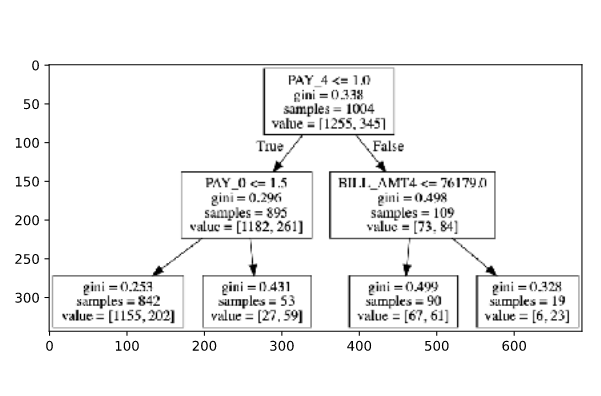

Conclusion

Excellent! You visualized and extracted some of the parameters of a random forest model.

# Introducing Hyperparameters

1. Hyperparameters Overview
In the previous lesson, you learned what parameters are. You will now learn what exactly hyperparameters are, how to find and set them, as well as some tips and tricks for prioritizing your efforts. Let's get started.

2. What is a hyperparameter
Hyperparameters are something that you set before the modeling process begins. You can think of them like the knobs and dials on an old radio. You tune the different dials and buttons and hope that a nice tune comes out. The algorithm does not learn the value of these during the modeling process. This is the crucial differentiator between hyperparameters and parameters. Whether you set it or the algorithm learns it and informs you.

3. Hyperparameters in Random Forest
We can easily see the hyperparameters by creating an instance of the estimator and printing it out. Here we create the estimator with default settings and call the print function on our estimator. Those are all our different knobs and dials we can set for our model. There are a lot! But what do they all mean? For this we need to turn to the Scikit Learn documentation.

4. A single hyperparameter
Let us take the example of the 'n_estimators' hyperparameter. We can see in the documentation that it tells us the data type and the default value And it also provides a definition of what it means.

5. Setting hyperparameters
We can set the hyperparameters when we create the estimator object. The default number of trees seems a little low, so let us set that to be 100. Whilst we are at it, let us also set the criterion to be 'entropy'. If we print out the model We can see the other default values remain the same, but those we set explicitly overrode the default values.

6. Hyperparameters in Logistic Regression
What about our logistic regression model, what were the hyperparameters for that? We follow the same steps. Firstly we create a logistic regression estimator. Then we print it out We can see there are less hyperparameters for this model than for the Random Forest.

7. Hyperparameter Importance
Some are more important than others. But before we outline important ones, there are some hyperparameters that definitely will *not* help model performance. These are related to computational decisions or what information to retain for analysis. With the random forest classifier, these hyperparameters will not assist model performance. How many cores to use will only speed up modeling time A random seed and whether to print out information as the modeling occurs also won't assist. Hence some hyperparameters you don't need to 'train' during your work.

8. Random Forest: Important Hyperparameters
There are some generally accepted important hyperparameters to tune for a Random Forest model. The n_estimators (how many trees in the forest) should be set to a high value, 500 or 1000 or even more is not uncommon (noting that there are computational costs to higher values) The max_features controls how many features to consider when splitting, which is vital to ensure tree diversity. The next two control overfitting of individual trees. The 'criterion' hyperparameter may have a small impact but it is not generally a primary hyperparameter to consider. Remember, this is just a guide and your particular problem may require attention on other hyperparameters.

9. How to find hyperparameters that matter?
There are hundreds of machine learning algorithms out there and learning which hyperparameters matter is knowledge you will build over time from a variety of sources. For example, there are some great academic papers where people have tried many combinations of hyperparameters for a specific algorithm on many datasets. These can be a very informative read! You can also find great blogs and tutorials online and consult the Scikit Learn documentation. Of course, one of the best ways to learn is just more practical experience! It is important you research this yourself to build your knowledge base for efficient modeling.

10. Let's practice!
Let's explore some hyperparameters in the exercises!

# Hyperparameters in Random Forests

As you saw, there are many different hyperparameters available in a Random Forest model using Scikit Learn. Here you can remind yourself how to differentiate between a hyperparameter and a parameter, and easily check whether something is a hyperparameter.

You can create a random forest estimator yourself from the imported Scikit Learn package. Then print this estimator out to see the hyperparameters and their values.

Which of the following is a hyperparameter for the Scikit Learn random forest model?

Possible Answers

1. oob_score
 - That's correct! oob_score set to True or False decides whether to use out-of-bag samples to estimate the generalization accuracy.
 
2. classes_
 - This is an output, not a hyperparameter.

3. trees
 - Whilst trees are important for this model, this is not the name of the hyperparameter that controls them.
4. random_level
 - Unfortunately we cannot simply set the level of randomness in this model. A nice idea though!

# Exploring Random Forest Hyperparameters

Understanding what hyperparameters are available and the impact of different hyperparameters is a core skill for any data scientist. As models become more complex, there are many different settings you can set, but only some will have a large impact on your model.

You will now assess an existing random forest model (it has some bad choices for hyperparameters!) and then make better choices for a new random forest model and assess its performance.

You will have available:

 - `X_train, X_test, y_train, y_test` DataFrames

 - An existing pre-trained random forest estimator, rf_clf_old

 - The predictions of the existing random forest estimator on the test set, rf_old_predictions

Instructions

1. Print out the hyperparameters of the existing random forest classifier by printing the estimator and then create a confusion matrix and accuracy score from it. The test set y_test and the old predictions rf_old_predictions will be quite useful!

2. Create a new random forest classifier with a better n_estimators (try 500) then fit this to the data and obtain predictions.

3. Assess the performance of the new random forest classifier. Create the confusion matrix and accuracy score and print them out. How does this compare to the first model you were given?

In [ ]:
# Print out the old estimator, notice which hyperparameter is badly set
print(rf_clf_old)

# Get confusion matrix & accuracy for the old rf_model
print("Confusion Matrix: \n\n {} \n Accuracy Score: \n\n {}".format(
  	confusion_matrix(y_test, rf_old_predictions),
  	accuracy_score(y_test, rf_old_predictions))) 

# Create a new random forest classifier with better hyperparamaters
rf_clf_new = RandomForestClassifier(n_estimators=500)

# Fit this to the data and obtain predictions
rf_new_predictions = rf_clf_new.fit(X_train, y_train).predict(X_test)

# Assess the new model (using new predictions!)
print("Confusion Matrix: \n\n", confusion_matrix(y_test, rf_new_predictions))
print("Accuracy Score: \n\n", accuracy_score(y_test, rf_new_predictions))

'''
<script.py> output:
    RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                max_depth=None, max_features='auto', max_leaf_nodes=None,
                min_impurity_decrease=0.0, min_impurity_split=None,
                min_samples_leaf=1, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                oob_score=False, random_state=42, verbose=0, warm_start=False)
    
    Confusion Matrix: 
    
     [[276  37]
     [ 64  23]] 
     Accuracy Score: 
    
     0.7475

Confusion Matrix: 
    
     [[300  13]
     [ 63  24]]
    Accuracy Score: 
    
     0.81
'''

Conclusion

Nice! We got a nice 5% accuracy boost just from changing the n_estimators. You have had your first taste of hyperparameter tuning for a random forest model.

# Hyperparameters of KNN

To apply the concepts learned in the prior exercise, it is good practice to try out learnings on a new algorithm. The k-nearest-neighbors algorithm is not as popular as it used to be but can still be an excellent choice for data that has groups of data that behave similarly. Could this be the case for our credit card users?

In this case you will try out several different values for one of the core hyperparameters for the knn algorithm and compare performance.

You will have available:

 - `X_train, X_test, y_train, y_test` DataFrames

Instructions

1. Build a knn estimator for the following values of n_neighbors [5,10,20].

2. Fit each to the training data and produce predictions.

3. Get an accuracy score for each model and print them out.

In [ ]:
# Build a knn estimator for each value of n_neighbours
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_20 = KNeighborsClassifier(n_neighbors=20)

# Fit each to the training data & produce predictions
knn_5_predictions = knn_5.fit(X_train, y_train).predict(X_test)
knn_10_predictions = knn_10.fit(X_train, y_train).predict(X_test)
knn_20_predictions = knn_20.fit(X_train, y_train).predict(X_test)

# Get an accuracy score for each of the models
knn_5_accuracy = accuracy_score(y_test, knn_5_predictions)
knn_10_accuracy = accuracy_score(y_test, knn_10_predictions)
knn_20_accuracy = accuracy_score(y_test, knn_20_predictions)
print("The accuracy of 5, 10, 20 neighbours was {}, {}, {}".format(knn_5_accuracy, knn_10_accuracy, knn_20_accuracy))

'''
<script.py> output:
    The accuracy of 5, 10, 20 neighbours was 0.7125, 0.765, 0.7825
'''

Conclusion

Phew! You succesfully tested 3 different options for 1 hyperparameter, but it was pretty exhausting. Next, we will try to find a way to make this easier.

# Setting & Analyzing Hyperparameter Values

1. Hyperparameter Values
In this lesson we will look more in depth at what values to set for different hyperparameters and begin automating our work.

2. Hyperparameter Values
Previously you learned that some hyperparameters are likely better to start your tuning with than others. What we didn't discuss was what values should you try. This will be specific to the algorithm and to the hyperparameter itself But there does exist best practice around this. Let's walk through some top tips for deciding ranges of values to try for different hyperparameters.

3. Conflicting Hyperparameter Choices
It is firstly important to know what values NOT to set as they may conflict. You will see in the Scikit Learn documentation for the Logistic Regression Algorithm, that some values of the hyperparameter 'penalty' conflict with some values of the hyperparameter 'solver' Another example from the ElasticNet algorithm demonstrates a softer conflict that will not result in an error, but may result in a model construction we had not anticipated. Safe to say, close inspection of the Scikit Learn documentation is important.

4. Silly Hyperparameter Values
There are also values for different hyperparameters that may be valid but are very unlikely to yield good results. Some examples of this are: Having a random forest algorithm with a very low number of trees. Would you consider it a forest if it had 2 trees? How about 5 or 10? Still probably not. But at 300, 500, 1000 or more that is definitely getting there! Having only 1 neighbor in a K-nearest neighbor algorithm. This algorithm averages votes of 'neighbors' to your sample. Safe to say averaging the vote of 1 person doesn't sound robust! Finally, incrementing some hyperparameters by a small amount is unlikely to greatly improve the model. One more tree in a forest for example, isn't likely to have a large impact. Researching and documenting sensible values for different hyperparameters and algorithms will be a very useful activity.

5. Automating Hyperparameter Choice
In the previous exercise you built several different models to test a single hyperparameter like so. This was quite an inefficient way of writing code, I think we can do better to test different values for the number of neighbors hyperparameter.

6. Automating Hyperparameter Tuning
One thing we could try is using a for loop. We create a list of values to test. Then loop through the list, creating an estimator, fitting and predicting each time. We append the accuracy to a list of accuracy scores to analyze after. This method easily allows us to test more values than our previous work.

7. Automating Hyperparameter Tuning
We can store the results in a DataFrame to view the effect of this hyperparameter on the accuracy of the model. It appears that adding any more neighbors doesn't help beyond 20.

8. Learning Curves
A common tool that is used to assist with analyzing the impact of a singular hyperparameter on an end result is called a 'learning curve'. Firstly let's create a list of many more values to test using Python's range function. The rest of the code is the same as before.

9. Learning Curves
Since we tested so many values, we will use a graph rather than a table to analyze the results. We plot the accuracy score on the Y axis and our hyperparameter value on our X axis.

10. Learning Curves
We can see our suspicions confirmed, that accuracy does not increase at all beyond where we tested before.

11. A handy trick for generating values
One thing to be aware of is that python's range function does not work for decimal steps which is important for hyperparameters that work on that scale. A handy trick uses NumPy's linspace function that will create a number of values, evenly spread between a start and end value that you specify. Here is a quick example you can see. 5 values, evenly spaced between 1 and 2 inclusive.

12. Let's practice!
Let's practice trying different hyperparameters and plotting some learning curves!

# Automating Hyperparameter Choice

Finding the best hyperparameter of interest without writing hundreds of lines of code for hundreds of models is an important efficiency gain that will greatly assist your future machine learning model building.

An important hyperparameter for the GBM algorithm is the learning rate. But which learning rate is best for this problem? By writing a loop to search through a number of possibilities, collating these and viewing them you can find the best one.

Possible learning rates to try include 0.001, 0.01, 0.05, 0.1, 0.2 and 0.5

You will have available X_train, X_test, y_train & y_test datasets, and GradientBoostingClassifier has been imported for you.

Instructions

1. Create a learning_rates list for the learning rates, and a results_list to hold the accuracy score of your predictions.

2. Write a loop to create a GBM model for each learning rate mentioned and create predictions for each model.

3. Save the learning rate and accuracy score to a results_list.

4. Turn the results list into a DataFrame and print it out.

In [ ]:
# Set the learning rates & results storage
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
results_list = []

# Create the for loop to evaluate model predictions for each learning rate
for rate in learning_rates:
    model = GradientBoostingClassifier(learning_rate=rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    # Save the learning rate and accuracy score
    results_list.append([rate, accuracy_score(y_test, predictions)])

# Gather everything into a DataFrame
results_df = pd.DataFrame(results_list, columns=['learning_rate', 'accuracy'])
print(results_df)

'''
<script.py> output:
       learning_rate  accuracy
    0          0.001    0.7825
    1          0.010    0.8025
    2          0.050    0.8100
    3          0.100    0.7975
    4          0.200    0.7900
    5          0.500    0.7775
'''

Conclusion

Nice! You efficiently tested a few different values for a single hyperparameter and can easily see which learning rate value was the best. Here, it seems that a learning rate of 0.05 yields the best accuracy.

# Building Learning Curves

If we want to test many different values for a single hyperparameter it can be difficult to easily view that in the form of a DataFrame. Previously you learned about a nice trick to analyze this. A graph called a 'learning curve' can nicely demonstrate the effect of increasing or decreasing a particular hyperparameter on the final result.

Instead of testing only a few values for the learning rate, you will test many to easily see the effect of this hyperparameter across a large range of values. A useful function from NumPy is np.linspace(start, end, num) which allows you to create a number of values (num) evenly spread within an interval (start, end) that you specify.

You will have available X_train, X_test, y_train & y_test datasets.

Instructions

1. Create a list of 30 learning rates evenly spread between 0.01 and 2.
 
2. Create a similar loop to last exercise but just save out accuracy scores to a list.

3. Plot the learning rates against the accuracy score.

In [ ]:
# Set the learning rates & accuracies list
learn_rates = np.linspace(0.01, 2, num=30)
accuracies = []

# Create the for loop
for learn_rate in learn_rates:
  	# Create the model, predictions & save the accuracies as before
    model = GradientBoostingClassifier(learning_rate=learn_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

# Plot results    
plt.plot(learn_rates, accuracies)
plt.gca().set(xlabel='learning_rate', ylabel='Accuracy', title='Accuracy for different learning_rates')
plt.show()

Conclusion

Excellent work! You can see that for low values, you get a pretty good accuracy. However once the learning rate pushes much above 1.5, the accuracy starts to drop. You have learned and practiced a useful skill for visualizing large amounts of results for a single hyperparameter.

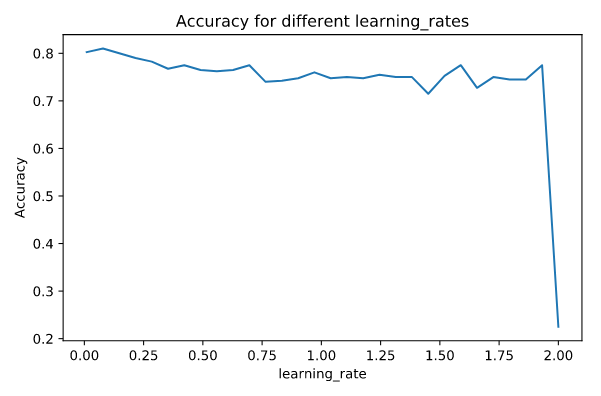